# Polytopes

This is a demonstration of how we can use computer algebra systems to learn new maths. 

A (convex) polytope can be defined in at least two equivalent ways.

## Polytopes as convex hulls

Suppose $V = \mathbb{R}^n$ is a vector space. Let $S\subset V$ be a *finite* set of points.

The set $S = \{x_1, \dots, x_k\}$ determines a *polytope* $P$ by taking the *convex hull*:
$$
    P = \mathrm{conv}(S) = \left\{ \lambda_1 x_1 + \cdots + \lambda_kx_k ~\middle|~ \lambda_i\geqslant 0,\ \lambda_1 + \cdots + \lambda_k = 1 \right\}.
$$

If $n=2$, we call polytopes *polygons*.

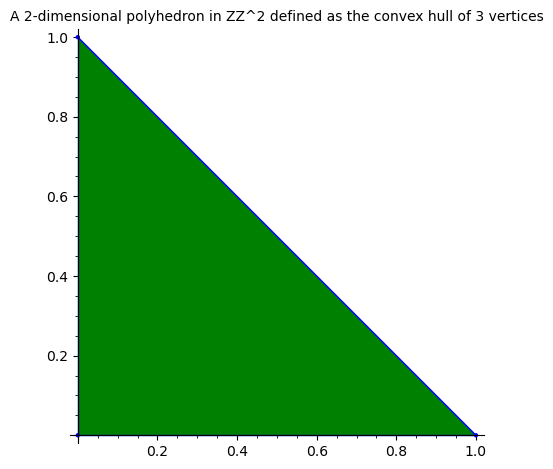

In [1]:
S = [(0, 0), (1, 0), (0, 1)]
P = Polyhedron(S)
P

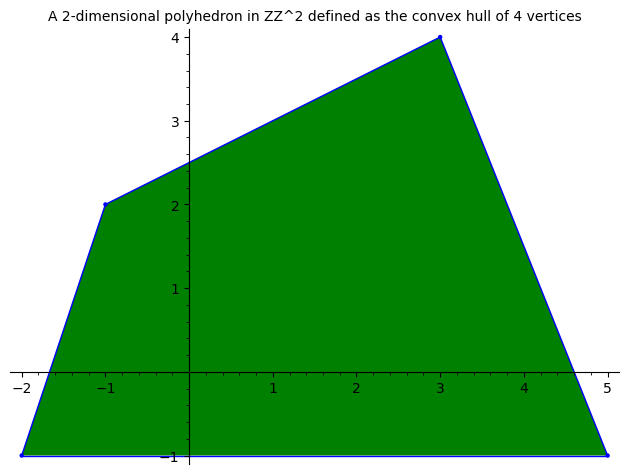

In [3]:
S = [(-1, 2), (3, 4), (-2, -1), (5, -1)]
P = Polyhedron(S)
P

In [9]:
S = [(0, 0, 0), (1, 0, 0), (0, 1, 0), (1, 1, 0), (1/2, 1/2, 1/2)]
P = Polyhedron(S)
P.plot()

Graphics3d Object

In [10]:
P.render_wireframe()

Graphics3d Object

## Polytopes as intersections of half-spaces

An *affine hyperplane* of $V$ is a translate of a subspace of codimension $1$ (i.e. dimension $n-1$ in $V$).

- For $n=1$, a hyperplane is a point.
- For $n=2$, a hyperplane is a line.
- For $n=3$, a hyperplane is a plane.

Every hyperplane splits $V$ into two **closed subsets** using the Euclidean metric. 

We can think of those spaces as 
- "above" and on the hyperplane,
- "below" and on the hyperplane.

These are called *closed half-spaces*. 

A closed half-space can be expressed with an inequality of the form
$$
    a_1 x_1 + \cdots + a_n x_n \geqslant b
$$

for $a_1,\dots, a_n,b \in\mathbb{R}$.

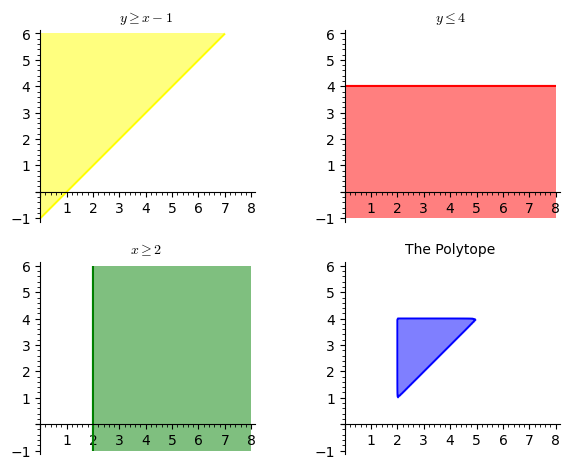

In [14]:
x, y = var('x, y')
p1 = region_plot(y>=x-1, (x,0,8), (y,-1,6), alpha=0.5, incol='yellow', bordercol='yellow', title='$y\\geq x-1$')
p2 = region_plot(y<=4, (x,0,8), (y,-1,6), alpha=0.5, incol='red', bordercol='red', title='$y\\leq 4$')
p3 = region_plot(x>=2, (x,0,8), (y,-1,6), alpha=0.5, incol='green', bordercol='green', title='$x\\geq 2$')
p4 = region_plot([y>=x-1, y<=4, x>=2], (x,0,8), (y,-1,6), alpha=0.5, bordercol='blue', title='The Polytope')
graphics_array(((p1, p2), (p3, p4)))

A *polytope* $P$ is the **bounded** intersection of a finite set of closed half-spaces.

We can represent the above polytope by the three inequalities:
$$
\begin{aligned}
    1-x_1 + x_2 &\geqslant 0 \\
    -2 + x_1 &\geqslant 0 \\
    4 - x_2 &\geqslant 0
\end{aligned}
$$

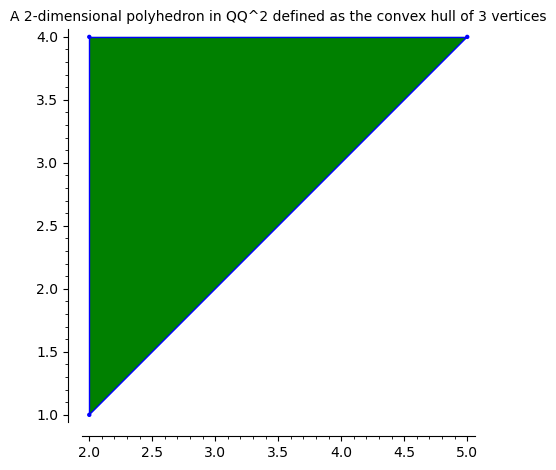

In [1]:
P = Polyhedron(ieqs=[
    (1, -1, 1),
    (-2, 1, 0), 
    (4, 0, -1)
])
P

## Playing with polytopes

One can construct (and find) well-known polytopes by `polytopes.<name>`.

In [4]:
P = polytopes.dodecahedron()
P.render_wireframe()

Graphics3d Object

The *V-representation* of a polytope is the subset of its vertices.

In [12]:
P.Vrepresentation()

(A vertex at (0, sqrt5 - 1, 2*sqrt5 - 4),
 A vertex at (0, sqrt5 - 1, -2*sqrt5 + 4),
 A vertex at (0, -sqrt5 + 1, 2*sqrt5 - 4),
 A vertex at (0, -sqrt5 + 1, -2*sqrt5 + 4),
 A vertex at (-sqrt5 + 3, -sqrt5 + 3, -sqrt5 + 3),
 A vertex at (2*sqrt5 - 4, 0, sqrt5 - 1),
 A vertex at (-sqrt5 + 3, sqrt5 - 3, -sqrt5 + 3),
 A vertex at (sqrt5 - 3, -sqrt5 + 3, -sqrt5 + 3),
 A vertex at (sqrt5 - 3, sqrt5 - 3, -sqrt5 + 3),
 A vertex at (-2*sqrt5 + 4, 0, sqrt5 - 1),
 A vertex at (-sqrt5 + 3, -sqrt5 + 3, sqrt5 - 3),
 A vertex at (-sqrt5 + 3, sqrt5 - 3, sqrt5 - 3),
 A vertex at (sqrt5 - 1, 2*sqrt5 - 4, 0),
 A vertex at (sqrt5 - 1, -2*sqrt5 + 4, 0),
 A vertex at (2*sqrt5 - 4, 0, -sqrt5 + 1),
 A vertex at (sqrt5 - 3, -sqrt5 + 3, sqrt5 - 3),
 A vertex at (sqrt5 - 3, sqrt5 - 3, sqrt5 - 3),
 A vertex at (-sqrt5 + 1, 2*sqrt5 - 4, 0),
 A vertex at (-sqrt5 + 1, -2*sqrt5 + 4, 0),
 A vertex at (-2*sqrt5 + 4, 0, -sqrt5 + 1))

The *H-representation* of a polytope is the set of bounding hyperplanes.

In [6]:
P.Hrepresentation()

(An inequality (0, -1/2, -1/4*sqrt5 - 1/4) x + 1 >= 0,
 An inequality (0, 1/2, -1/4*sqrt5 - 1/4) x + 1 >= 0,
 An inequality (-1/2, -1/4*sqrt5 - 1/4, 0) x + 1 >= 0,
 An inequality (-1/2, 1/4*sqrt5 + 1/4, 0) x + 1 >= 0,
 An inequality (-1/4*sqrt5 - 1/4, 0, -1/2) x + 1 >= 0,
 An inequality (-1/4*sqrt5 - 1/4, 0, 1/2) x + 1 >= 0,
 An inequality (1/2, -1/4*sqrt5 - 1/4, 0) x + 1 >= 0,
 An inequality (1/2, 1/4*sqrt5 + 1/4, 0) x + 1 >= 0,
 An inequality (1/4*sqrt5 + 1/4, 0, -1/2) x + 1 >= 0,
 An inequality (0, -1/2, 1/4*sqrt5 + 1/4) x + 1 >= 0,
 An inequality (0, 1/2, 1/4*sqrt5 + 1/4) x + 1 >= 0,
 An inequality (1/4*sqrt5 + 1/4, 0, 1/2) x + 1 >= 0)

We can compute the volume of the polytope.

In [17]:
P.volume()

-176*sqrt5 + 400

FACES

In [23]:
P.f_vector()

(1, 20, 30, 12, 1)

A DIFFERENT POLYTOPE

## Exercises

1. Construct a polytope $P$ that is the convex hull of 6 points but $P$ has only 5 vertices.
2. Construct a polytope $P$ that is bounded by 6 hyperplanes but $P$ has only $5$ facets.
3. Find a few named polytopes (i.e. from `polytopes.<name>`) and plot them.